# FIT5149 S1 2020 Assessment 1: 
# Bushfire Analysis using Meteorological Data

Student information
- Family Name: Wu
- Given Name: Bowei
- Student ID: 30000483
- Student email: bwuu0019@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- dplyr
- plyr
- psych
- ggplot2
- GGally
- leaps
- ggpubr
- car
- glmnet
- FNN

# Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

# 1. Introduction <a class="anchor" id="sec_1"></a>

This notebook reports several findings of the data analysis performed on the area burned based on the dataset "forestfires.csv". The dataset contains 517 rows and 13 columns to describe the status of the area burned during bushfires from the northeast region of Portugal between January 2000 and December 2003. This data analysis aims to predict the burned area of a bushfire given the collected area and explaining the prediction and associated findings. 

The first section shows the explanatory data analysis(EDA) to explore and understand the data. This section includes some data wrangling and transformation, for a better understanding of the data and their distribution. Besides, correlation analysis also conducted through visual analysis. The key findings of the EDA will be concluded in summary. 

The second section shows the development of different regression models and relevant discussion of each model. This section splits the dataset into a training set and testing set, and train models based on the training dataset. Then predict the area in the test set using trained models. The process of building models and subset selection will be clearly explained. 

The third section calculates the error between the predicted area from each trained model and the actual burned area, and discuss which model has the highest accuracy in predicting area. The difference among each model and associated advantages and disadvantages will be fully discussed

The last section interprets the inference of each model. The discussion includes the significance of each explanatory variable in the regression model, the relationship between the response and each predictor, and whether the relationship between burned area and each predictor is linear related or more complicated. 

## Load Library

In [1]:
library(dplyr)
library(plyr)
library(psych)
library(ggplot2)
library(GGally)
library(leaps)
library(ggpubr)
library(car)
library(glmnet)
library(FNN)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

Warning message:
"package 'psych' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'gg

## Read Data

In [2]:
# Load the data set
data = read.csv('forestfires.csv')

# 2. Data Exploration<a class="anchor" id="sec_2"></a>

## a. Overview of the datasets

In [3]:
# Display the structure
str(data)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [4]:
# Statistic summary
summary(data)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

### Summary of attributes

Based on the structure of each variable and the summary description in the data provided above, this dataset contains 517 observations, each with 13 attributes. The structures of attributes include integer, factor, and numeric. A more detailed summary of each attribute is provided

**X:** x-axis spatial coordinate within the Montesinho park map: 1 to 9

**Y:** y-axis spatial coordinate within the Montesinho park map: 2 to 9

**month:** month of the year: "jan" to "dec" 

**day:** day of the week: "mon" to "sun"

**FFMC:** Fine fuel moisture code from the FWI system: 18.7 to 96.20. It denotes the moisture content surface litter and influences ignition and fire spread

**DMC:** Duff moisture code from the FWI system: 1.1 to 291.3. It represent the moisture content of shallow and deep organic layers, which affect fire intensity

**DC:** Drought code from the FWI system: 7.9 to 860.6. It also represent the moisture content of shallow and deep organic layers, which affect
fire intensity

**ISI:** ISI index from the FWI system: 0.0 to 56.10. A score that correlates with fire velocity spread

**temp:** temperature in Celsius degrees: 2.2 to 33.30

**RH:** relative humidity in %: 15.0 to 100

**wind:** wind speed in km/h: 0.40 to 9.40

**rain:** outside rain in mm/m2 : 0.0 to 6.4

**area:** the burned area of the forest (in ha): 0.00 to 1090.84

## b. Data Wrangling

This section transforms the data and introduces some new variables, to see whether the new variables help in explaning the variation in the response variable. 

In [5]:
# level the structure for the variables month and day
data$month = factor(data$month, levels = c('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'))
data$day = factor(data$day, levels = c('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'))

# convert the structure for coordinates X and Y into factor instead of integer
data$X = factor(data$X)
data$Y = factor(data$Y)

In [6]:
# Create a variable, and rename the values in the attribute day
# Rename the day during weekday into weekday
data$day_type = NA
data[data$day %in% c('mon', 'tue', 'wed', 'thu', 'fri'), 14] = 'Workingday'
data[data$day %in% c('sat', 'sun'), 14] = 'Weekend'

# Convert into factor instead of string
data$day_type = factor(data$day_type)

# Create a variable, and rename the values in the attribute month
# Rename the month according to the season in Portugal
data$season = NA
data[data$month %in% c('jan', 'feb', 'dec'), 15] = 'Winter'
data[data$month %in% c('mar', 'apr', 'may'), 15] = 'Spring'
data[data$month %in% c('jun', 'jul', 'aug'), 15] = 'Summer'
data[data$month %in% c('sep', 'oct', 'nov'), 15] = 'Autumn'
data$season = factor(data$season, level = c('Winter', 'Spring', 'Summer', 'Autumn'))

In [7]:
describe(data[,-c(1:4, 14:16)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
FFMC,1,517,90.64468085,5.5201108,91.60,91.454940,1.927380,18.7,96.20,77.50,-6.5374989,66.1393621,0.24277420
DMC,2,517,110.87234043,64.0464822,108.30,106.522410,51.742740,1.1,291.30,290.20,0.5443249,0.1789299,2.81676107
DC,3,517,547.94003868,248.0661917,664.20,578.692289,118.904520,7.9,860.60,852.70,-1.0940678,-0.2650719,10.90993864
ISI,4,517,9.02166344,4.5594772,8.40,8.727470,3.113460,0.0,56.10,56.10,2.5216267,21.1458110,0.20052558
temp,5,517,18.88916828,5.8066253,19.30,19.091084,5.337360,2.2,33.30,31.10,-0.3292530,0.1111986,0.25537509
RH,6,517,44.28820116,16.3174692,42.00,42.706024,14.826000,15.0,100.00,85.00,0.8579033,0.4091470,0.71764148
wind,7,517,4.01760155,1.7916526,4.00,3.898795,1.927380,0.4,9.40,9.00,0.5676920,0.0304595,0.07879679
rain,8,517,0.02166344,0.2959591,0.00,0.000000,0.000000,0.0,6.40,6.40,19.7015038,415.5969287,0.01301627
area,9,517,12.84729207,63.6558185,0.52,3.181952,0.770952,0.0,1090.84,1090.84,12.7724827,191.5020312,2.79957970


From the output above, it provides the statistics summary of each attribute. 

The column called trimmed, it calculates the trimmed mean of each attribute by removing a small percentage of the largest and smallest value. Since there are some extremely high values in the area column, the trimmed mean is significantly different from the normal mean, which is 3.18 and 12.85 respectively. 

For range column, it shows there is a huge difference between the minimum and maximum value in the area and DC attributes (the range is 1090.84 and 852.7 respectively). Therefore, outliers might exist in these two columns. 

In terms of skewness, normal distribution will have a skewness of 0. From the table above, none of these attributes is normal distributed. Especially for area, rain, and FFMC, the absolute magnitude of skewness is extremely large, which indicate these column is heavily skewed. 

In terms of kurtosis, normal distribution will have a kurtosis of 3. From the table above, none of these attributes has a value of kurtosis close to 3. FFMC, ISI, rain, and area show heavier tails than a normal distribution, and DMC, DC, temp, RH, and wind show lighter tails than a normal distribution

## c. Visualisation 
### 1. View the variable distributions using boxplots

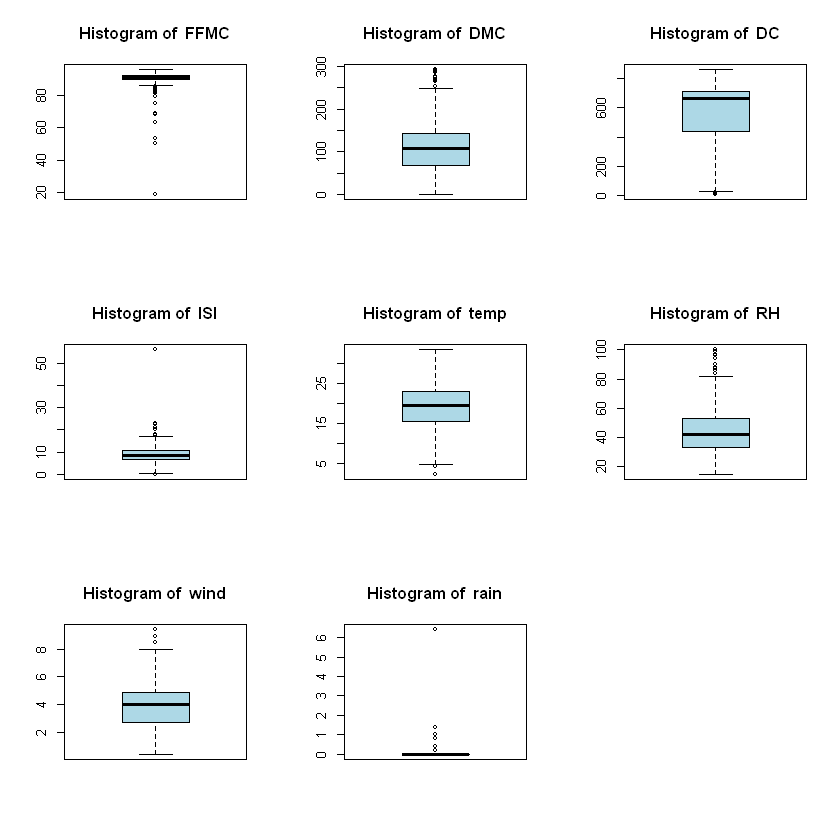

In [8]:
# Generate box plots for all variables except the categorical variables
par(mfrow = c(3,3))
for (i in 5:(length(data)-3)){
   boxplot(data[,i], main = paste('Histogram of ', colnames(data[i])), type = 'l', col = 'lightblue')
}

These boxplots provide the visualisation of the statistics summary table above, and it shows the value distribution within each attribute. For rain and area, the values in these columns are centered at 0, with some outliers. For FFMC, the values are centered at 90, with some outliers below 80. For ISI, there is an outlier stay above 50. 

### 2. Comparing the visualisation of burned area by months and seasons

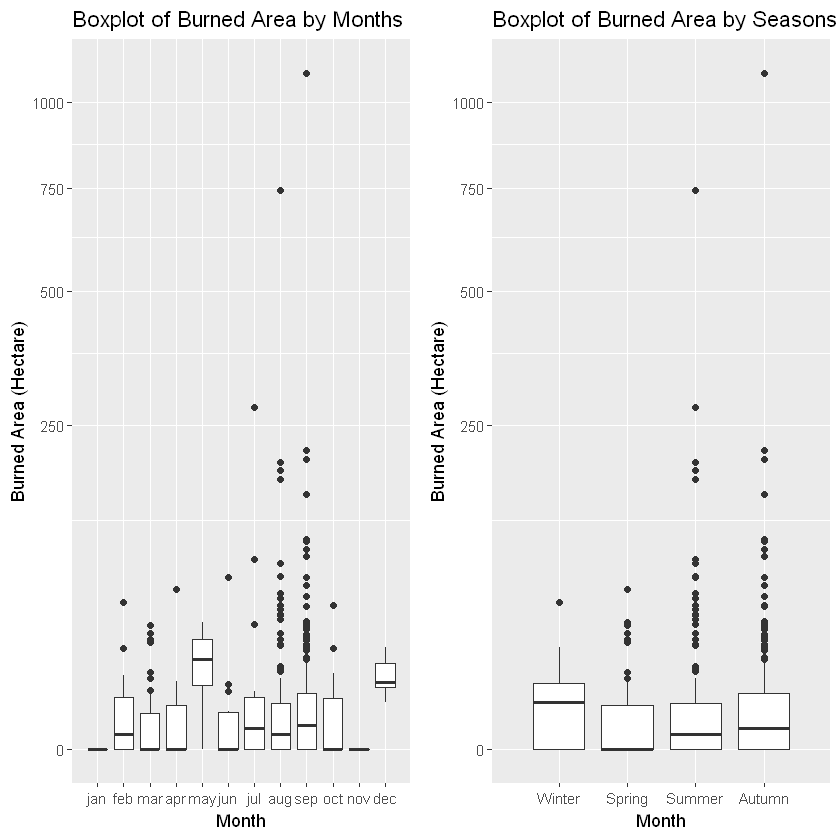

In [9]:
# Visualise two plots to see which variable provides better interpretability
month = ggplot(data = data, aes(x = month, y = area)) + 
   geom_boxplot() + 
   coord_trans(y = "sqrt") + 
   labs(x = "Month", y = "Burned Area (Hectare)", title ="Boxplot of Burned Area by Months")

season = ggplot(data = data, aes(x = season, y = area)) + 
   geom_boxplot() + 
   coord_trans(y = "sqrt") + 
   labs(x = "Month", y = "Burned Area (Hectare)", title ="Boxplot of Burned Area by Seasons")

ggarrange(month, season, nrow = 1, ncol = 2)

In [10]:
# Extract the data in May
data[data$month %in% 'may',]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_type,season
305,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0,0.00,Weekend,Spring
472,4,3,may,fri,89.6,25.4,73.7,5.7,18.0,40,4.0,0,38.48,Workingday,Spring


In [11]:
# Extract the data in Dec
data[data$month %in% 'dec',]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_type,season
274,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0,8.98,Weekend,Winter
275,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0,11.19,Workingday,Winter
276,4,6,dec,thu,84.6,26.4,352.0,2.0,5.1,61,4.9,0,5.38,Workingday,Winter
277,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,17.85,Workingday,Winter
278,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,10.73,Workingday,Winter
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,22.03,Workingday,Winter
280,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0,9.77,Workingday,Winter
281,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0,9.27,Workingday,Winter
282,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0,24.77,Workingday,Winter


These two graphs show:
- In Portugal, the summer season is actually from June to the mid of September, and most bushfires occurred from July and September. 
- The median of the burned area during May is higher than all other months. It is because there are only two records, and one of these records is 38.5, which leverages the value of the median burned area during May.
- Unlike only a few records during May, there are 9 records during December, and each record of the burned area is far higher than the trimmed mean of burned area. December in Portugal is the winter season. This unusual finding of high burned area may relate to human trips or holidays during the end of each year, or high velocity of wind which boosts the spread of fire, as the wind speed is as twice as the trimmed mean.
- From the month plot, except the most extreme value during autumn, it shows a trend of the frequency of bushfire occurred and the area burned is increasing from Spring to Winter. The most frequent bushfire and highest area burned all happened during summer and Autumn. 
- Season has more interpretability than month does

#### 2.1. Take a closer look at each attribute in each season

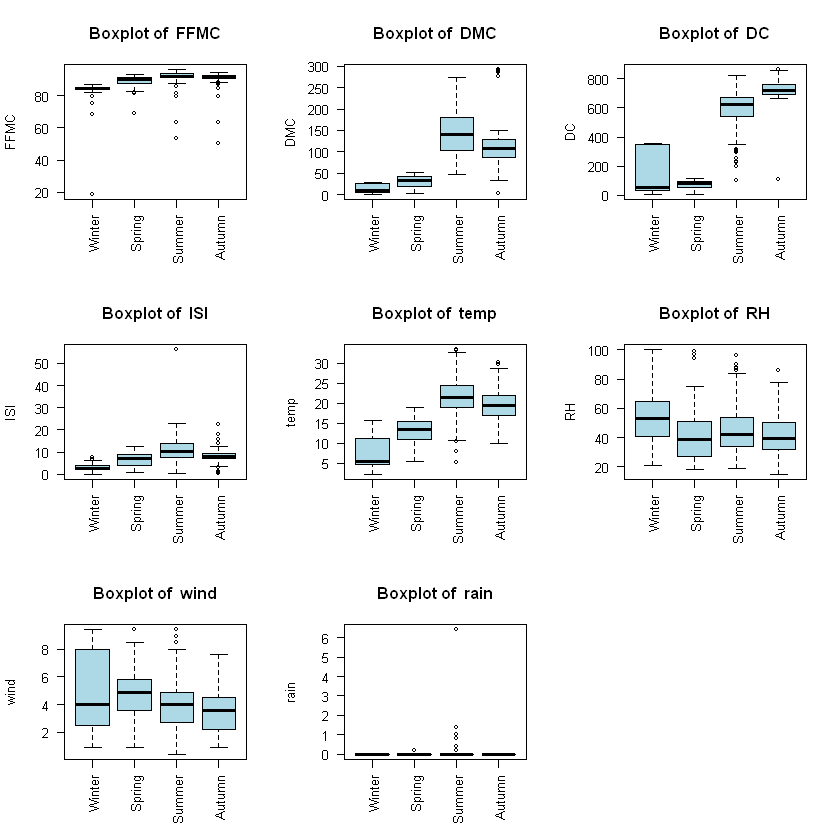

In [12]:
# Boxplot of each variables by seasons to detect any seasonality effect
par(mfrow = c(3,3))
for (i in 5:(length(data)-3)){
   boxplot(data[,i]~data$season, main = paste('Boxplot of ', colnames(data[i])), type = 'l', col = 'lightblue', ylab = colnames(data[i]),
          las = 2, xlab = NA)
}

In [13]:
# Group the rain by season
group_rain_byseason =  ddply(data, c('season'), dplyr::summarise,
                               Count = n(),
                               Mean = round(mean(rain),3),
                               Sum = sum(rain),
                               Min = min(rain),
                               Max = max(rain),
                               Range = Max - Min)
group_rain_byseason

season,Count,Mean,Sum,Min,Max,Range
Winter,31,0.000,0.0,0,0.0,0.0
Spring,65,0.003,0.2,0,0.2,0.2
Summer,233,0.047,11.0,0,6.4,6.4
Autumn,188,0.000,0.0,0,0.0,0.0


In [14]:
# Group the area by season
group_area_byseason =  ddply(data, c('season'), dplyr::summarise,
                               Count = n(),
                               Mean = round(mean(area),3),
                               Sum = sum(area),
                               Min = min(area),
                               Max = max(area),
                               Range = Max - Min)
group_area_byseason

season,Count,Mean,Sum,Min,Max,Range
Winter,31,7.918,245.47,0,51.78,51.78
Spring,65,5.442,353.76,0,61.13,61.13
Summer,233,12.262,2857.12,0,746.28,746.28
Autumn,188,16.945,3185.70,0,1090.84,1090.84


As expected, the temperatures and indexes including FFMC, DMC, DC, ISI are the highest during summer and autumn, which accelerate the probability of bushfire occurred and spread of fire. Therefore, there is higher frequency of having bushfire during Summer and Autumn
Interestingly, the highest level of rainfall is during summer while having the highest frequency of recorded bushfire. Besides, the highest mean of area burned is during Autumn instead of during Summer.

As showed in the boxplot of each attribute by season, the outlier effect is heavier during Summer and Autumn, and range of area within these two sesons are 746 and 1090 respectively.

### 3. Comparing the visualisation of day and day type

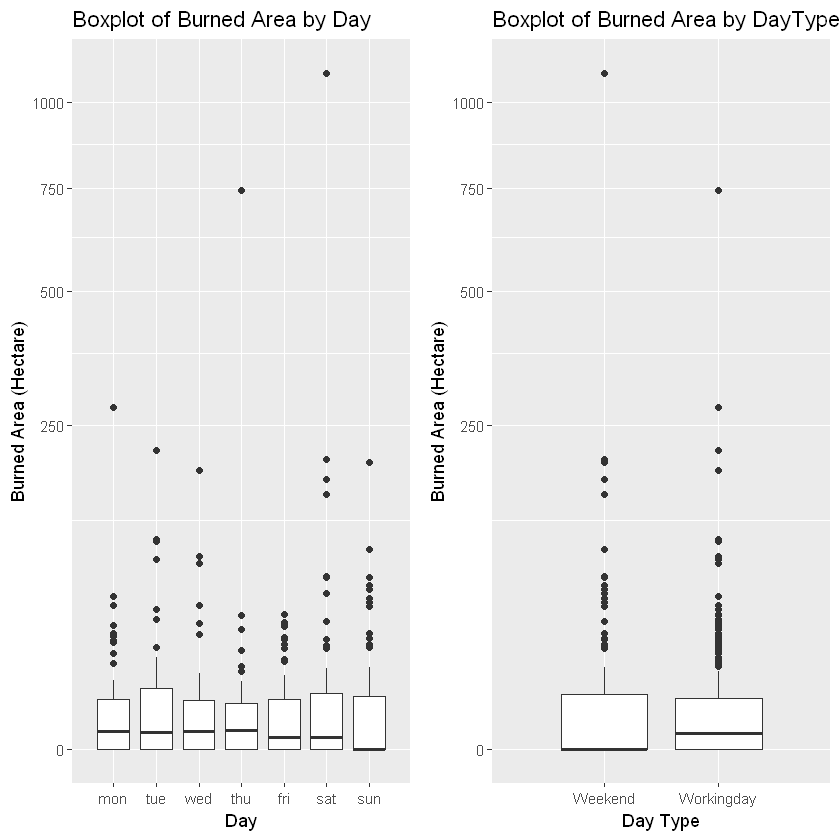

In [15]:
# Visualise two plots to see which variable provides better interpretability
day = ggplot(data = data, aes(x = day, y = area)) + 
   geom_boxplot() + 
   coord_trans(y = "sqrt") + 
   labs(x = "Day", y = "Burned Area (Hectare)", title ="Boxplot of Burned Area by Day")

day_type = ggplot(data = data, aes(x = day_type, y = area)) + 
   geom_boxplot() + 
   coord_trans(y = "sqrt") + 
   labs(x = "Day Type", y = "Burned Area (Hectare)", title ="Boxplot of Burned Area by DayType")

ggarrange(day, day_type, nrow =1 , ncol =2)

The median in the day left plot is similar across each day. Combining with the day type plot, the burned area does not significnat relates to any particular day or day type. 

### 4. Detailed matrix plot

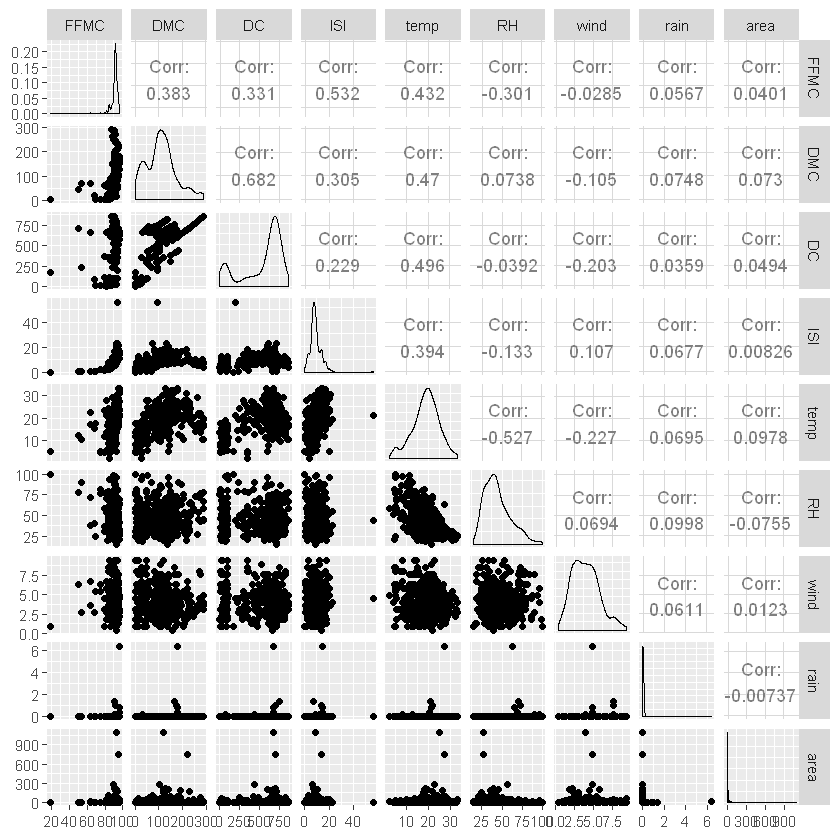

In [16]:
# Plot the variables using scatterplot matrix to visualise the correlation between variables and histogram
ggpairs(data[,-c(1:4, 14:16)])

This matrix plot show:

FFMC:
- FFMC is moderate positive correlated to DMC, DC, ISI, and temp, and moderate negative correlated to RH
- 40% of the variation in FFMC can be explained by DMC, DC, ISI, temperature, and RH
- FFMC is left-skewed
- The relationship between ISI and FFMC shows an exponential relationship. 60% of the variation in log ISI can be explained by FFMC

DMC:
- DMC is strong positive correlated to DC, and moderate positive correlated to ISI and temperature
- 50% of the variation in DMC can be explained by DC, ISI, and temperature
- DMC is multimodal distributed and right-skewed.

DC:
- DC is weak positive correlated to ISI; moderate positive correlated to temperature; and weak negative correlated to wind speed
- 51% of the variation in DC can be explained by FFMC, DMC, ISI, temperature, and wind 
- DC is multimodal distributed and left-skewed

ISI;
- ISI is moderate positive correlated to temperature, and week positive correlated to wind speed
- 32% of the variation in ISI can be explained by FFMC, DMC, DC, and temperature
- ISI is right-skewed

temp:
- temperature is moderate negative correlated to RH and wind speed
- 61% of the variation in temperature can be explained by FFMC, DMC, DC, ISI, RH, and wind
- approximate normal distributed, slightly left-skewed

RH:
- 30% of the variation in RH can be explained by FFMC, ISI, and temperature
- RH is right-skewed

wind:
- weak positive correlated to each attribute
- the wind is right-skewed

rain:
- rain is right-skewed

### 5. Histograms of area

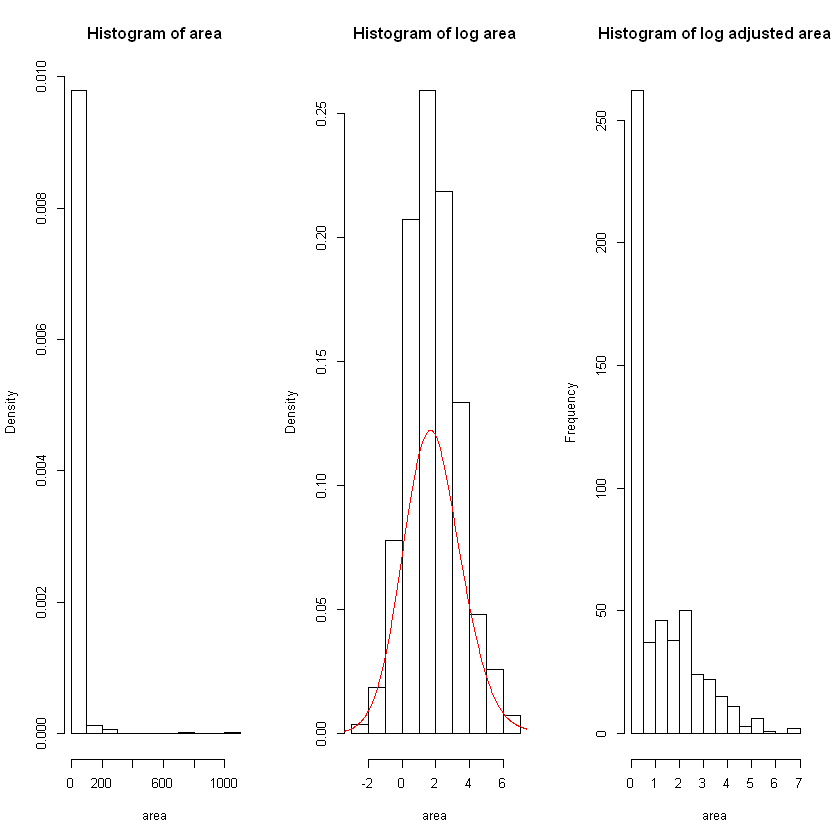

In [17]:
# Plot the histogram of area with different transformation
par(mfrow = c(1,3))
hist(data$area, main = 'Histogram of area', xlab = 'area', prob = T)
hist(log(data$area), main = 'Histogram of log area', xlab = 'area', prob = T)
lines(density(log(data$area), adjust = 2), col = 'red')
hist(log(data$area + 1), main = 'Histogram of log adjusted area', xlab ='area')

The left plot presents the histogram of the original value of the area, and it is right-skewed. 

The mid plot presents the histogram of the log-transformed area, and it is normal distributed. However, it is impossible to have a negative value in measuring the burned area

The right plot presents the histogram of the log(area+1) adjusted area, and it is right-skewed. 

The log(area+1) is the appropriate transformation comparing to log, and log(area +1) will be used to train and predict during modeling section

#### 6. Total area burned and frequency at each site

In [18]:
# Group the area by each site
groupbycoordinate = ddply(data, c('X','Y'), dplyr::summarise,
                       Count = n(),
                       Mean = round(mean(area),3),
                       Sum = sum(area),
                       Min = min(area),
                       Max = max(area),
                       Range = Max - Min)
head(groupbycoordinate)

X,Y,Count,Mean,Sum,Min,Max,Range
1,2,19,11.576,219.94,0.00,212.88,212.88
1,3,10,15.714,157.14,0.00,70.76,70.76
1,4,15,10.019,150.28,0.00,82.75,82.75
1,5,4,28.867,115.47,1.46,95.18,93.72
2,2,25,18.506,462.65,0.00,200.94,200.94
2,3,1,0.000,0.00,0.00,0.00,0.00


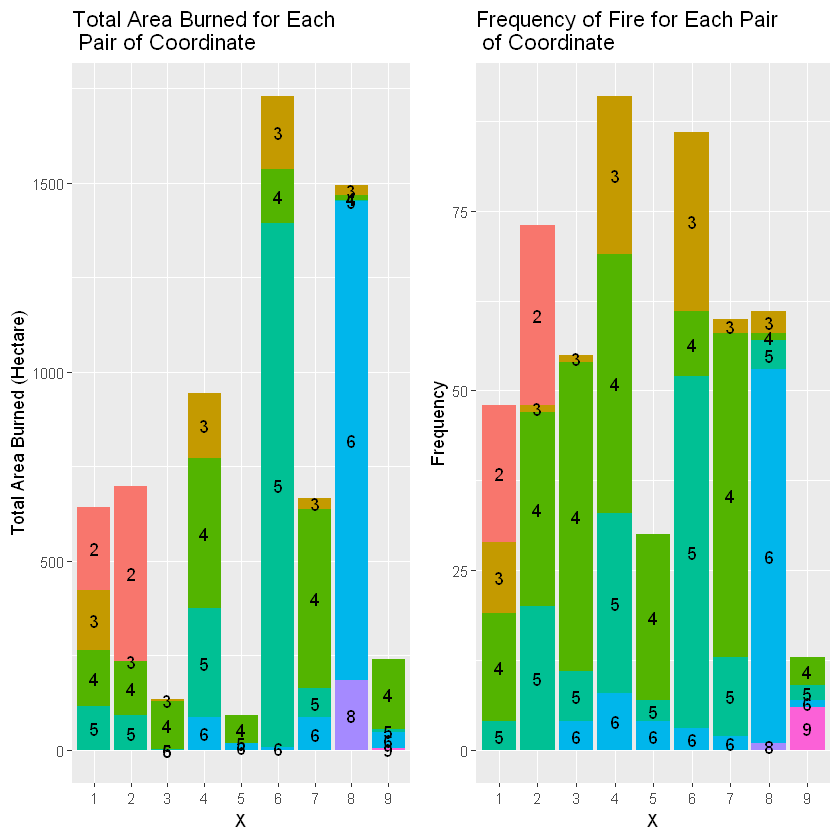

In [19]:
# Visualise the bushfire data for each coordinate
Area = ggplot(groupbycoordinate, aes(x = X, y = Sum, fill = Y)) + 
   geom_bar(stat = 'identity') +
   geom_text(aes(label = Y), position = position_stack(vjust = 0.5)) + 
   labs(y = 'Total Area Burned (Hectare)') +
   ggtitle('Total Area Burned for Each \n Pair of Coordinate')

Frequency = ggplot(groupbycoordinate, aes(x = X, y = Count, fill = Y)) + 
   geom_bar(stat = 'identity') +
   geom_text(aes(label = Y), position = position_stack(vjust = 0.5)) + 
   labs(y = 'Frequency') +
   ggtitle('Frequency of Fire for Each Pair \n of Coordinate')

ggarrange(Area, Frequency, nrow = 1, ncol =2, legend = 'none')

Combining these two plots, when Y coordinates at 4, 5, and 6, regardless of the coordinate of X, there is a high frequency of bushfire occurred and high value of the burned area. 

When X coordinates at 3, 5, and 9, both frequency and area burned of bushfire is the lowest comparing to other coordinates. Especially for the X coordinate 3, the frequency of bushfire is indifference from the X coordinate 7, whereas the total area burned is significantly lower than there. 

When X coordinates at 2 and 4, the frequency counts the most compared to other coordinates of X. However, the area burned is not the highest. 

#### 7. Total area burned and frequency of each season

In [20]:
# Group the area by season and day type
groupbyseason_daytype =  ddply(data, c('season', 'day_type'), dplyr::summarise,
                               Count = n(),
                               Mean = round(mean(area),3),
                               Sum = sum(area),
                               Min = min(area),
                               Max = max(area),
                               Range = Max - Min)
head(groupbyseason_daytype)

season,day_type,Count,Mean,Sum,Min,Max,Range
Winter,Weekend,11,7.912,87.03,0,51.78,51.78
Winter,Workingday,20,7.922,158.44,0,24.77,24.77
Spring,Weekend,22,7.696,169.31,0,61.13,61.13
Spring,Workingday,43,4.290,184.45,0,38.48,38.48
Summer,Weekend,88,10.237,900.82,0,196.48,196.48
Summer,Workingday,145,13.492,1956.30,0,746.28,746.28


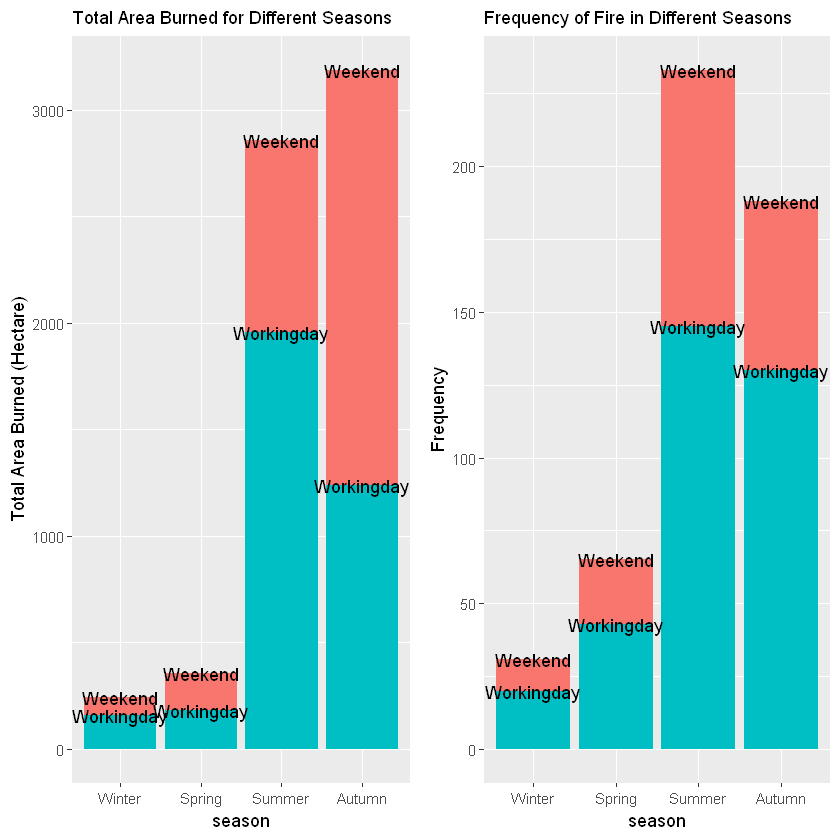

In [21]:
# Visualise how the bushfire relates to seasons and day types
Area_by_month = ggplot(groupbyseason_daytype, aes(x = season, y = Sum, fill = day_type)) + 
   geom_bar(stat = 'identity') +
   geom_text(aes(label = day_type), position = 'stack') + 
   labs(y = 'Total Area Burned (Hectare)') +
   ggtitle('Total Area Burned for Different Seasons') + theme(plot.title = element_text(size = 11))

Frequency_by_month = ggplot(groupbyseason_daytype, aes(x = season, y = Count, fill = day_type)) + 
   geom_bar(stat = 'identity') +
   geom_text(aes(label = day_type), position = 'stack') + 
   labs(y = 'Frequency') +
   ggtitle('Frequency of Fire in Different Seasons') + theme(plot.title = element_text(size = 11))

ggarrange(Area_by_month, Frequency_by_month, nrow = 1, ncol = 2, legend = 'none')

As expected, the most bushfire and highest area burned are all happened during the summer and autumn, and more fires happened and area burned during working day than the weekend, as there are 5 days in weekday

### 8. Summary of EDA

The findings from the EDA section are:
- There is a significant outlier effect in the area column, as the difference between the mean and trimmed mean is huge
- Groups the month into season gives more interpretability
- The area burned and frequency of bushfire during Summer and Autumn is the highest
- Many features show seasonality. e.g. Higher temperature, DC, and ISI index during Summer. 
- There are correlations among features, and the relationship between ISI and FFMC is non-linear.
- Most of the features are not normal distributed
- The area should be transformed into the log(area+1)
- Day type does not significantly influence the area burned

# 3. Model Development<a class="anchor" id="sec_3"></a>

Based on the original dataset, this report transformed the day into day type, months into seasons. Thus, it is important to exclude either original features or transformed features, which prevents involving redundant variables. 

The findings from EDA suggests:
1. The season has higher interpretability than a month
2. Day type does not influence the frequency and area of bushfire
3. Transformed log(area+1) is better than the area in modeling

Therefore, it is essential to conduct some simple linear models to examine which variables should be excluded from the modeling.

After building several simple linear models, 
- exclude day and include day type: 
    - R Squares of including only day and day type are all close to 0.but day type has higher R square than day
    - p-values are 0.28 and 0.06, the regression of including day type only is more significant than the that includes day only;
 
- exclude month and include season:
    - R squares of including only month and season are all close to 0, but the season has higher R square than the month
    - p-values are 0.9521 and 0.3903 respectively. Therefore the regression contains season only is more significant than that contain month only    

Besides, two regressions using the same explanatory variables, the one with log(area+1) as a dependent variable has higher R-Square and lower p-value than using area. Therefore, this report uses log(area+1) as the dependent variable for all models. 

In this section, several models will be developed including both parametric and non-parametric models. However, after building a GAM model (not shown here), the effective degrees of freedom suggests the best complexity of the smooth for each feature is 1, which is linear. Therefore, this section will build several linear models, and select one of them to do the prediction. 

In [22]:
# Separate into training set and test set
set.seed(123456)
train_sample = sample(1:nrow(data), 0.8*nrow(data))
train_data = data[train_sample, ] %>%
    select(-c('day', 'month'))

test_data = data[-train_sample, ] %>%
   select(-c('day', 'month'))

## Linear models
### First model

In [23]:
# The first model using all attributes in the training dataset
modelfull = lm(log(area+1)~., data = train_data)

Warning message:
"not plotting observations with leverage one:
  274"Warning message:
"not plotting observations with leverage one:
  274"

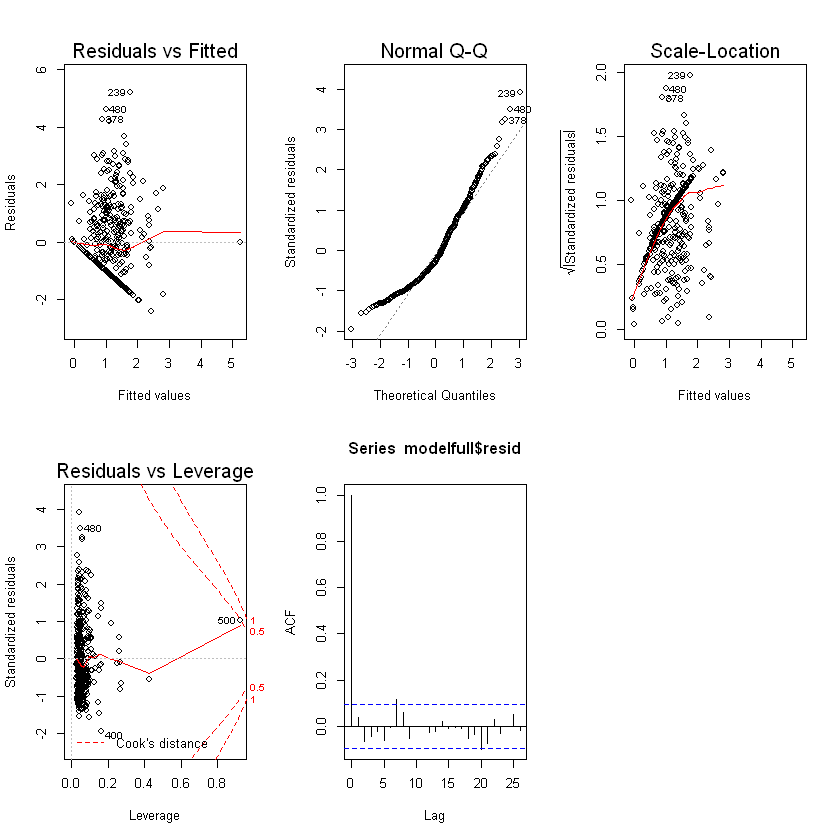

In [24]:
# Check the residuals plots
par(mfrow = c(2, 3))
plot(modelfull)
acf(modelfull$resid)

From the residual check, the first graph named 'Residuals VS Fitted' is used to check for non-randomness. It is expected to see the residuals are equally spread around the horizontal line without distinct patterns. The graph indicates the red line is not horizontal at 0. Therefore, the residuals violate the assumption of non-randomness. 

The second graph named 'Normal Q-Q' is used to test the normality assumption. The graph shows the normal probability plot of residual is not following the red line as the tail of the qqplot is skewed away from the dashed line. 

The third graph named 'Scale-Location' is used to check the homogeneity of variance of the residuals. The plot shows the red line is not a horizontal line, which indicates the residuals violate the assumption of homoscedasticity. 

The fourth graph named 'Residuals VS Leverage' is used to check whether there is an influence point. From the graph, there is a point go beyond the cook's distance. Therefore, the residuals have an influential point effect. 

The last graph named 'Series residuals' is used to test the auto-correlation within the residuals. Based on the 5% significant level, it is expected to see a lag exceeds a 5% significance level for every 20 lags. Therefore, the graph shows the errors does not dependent on the last lag.

This full model violates all the assumptions of linear model, the next model is using best subset selection to remove some unimportant features

### Second model using best subset selection

In [25]:
# Perform best sub selection from all features
modelsets = regsubsets(log(area+1)~.,, data = train_data)
models_summary = summary(modelsets)

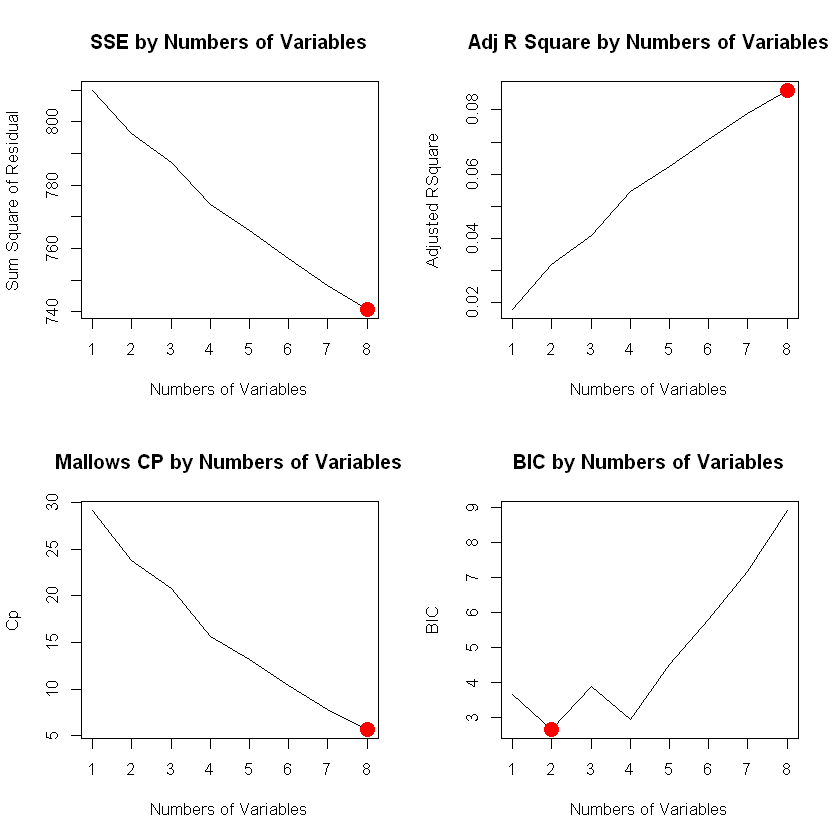

In [26]:
par(mfrow = c(2,2))
# Find the best subset model using SSE, Adj R Square, Mallow's CP, and BIC
plot(models_summary$rss, type = 'l', xlab = 'Numbers of Variables', ylab = 'Sum Square of Residual',
     main = 'SSE by Numbers of Variables')
points(which.min(models_summary$rss), models_summary$rss[which.min(models_summary$rss)], col = 'red', pch = 20, cex =3)

plot(models_summary$adjr2, type = 'l', xlab = 'Numbers of Variables', ylab = 'Adjusted RSquare',
     main = 'Adj R Square by Numbers of Variables')
points(which.max(models_summary$adjr2), models_summary$adjr2[which.max(models_summary$adjr2)], col = 'red', pch = 20, cex =3)

plot(models_summary$cp, type = 'l', xlab = 'Numbers of Variables', ylab = 'Cp', 
     main = 'Mallows CP by Numbers of Variables')
points(which.min(models_summary$cp), models_summary$cp[which.min(models_summary$cp)], col = 'red', pch = 20, cex =3)

plot(models_summary$bic, type = 'l', xlab = 'Numbers of Variables', ylab = 'BIC',
     main = 'BIC by Numbers of Variables')
points(which.min(models_summary$bic), models_summary$bic[which.min(models_summary$bic)], col = 'red', pch = 20, cex =3)

The above plots indicate the regression including 8 explanatory variables is the optimal regression. The coefficient of each selected variable is shown below 

In [27]:
coef(modelsets, 8)

(Intercept)           X3           X5           X9           Y8           Y9 
   1.0811222   -0.6413011   -0.5910147    1.5493141    4.1332393   -1.8968881 
        wind seasonSpring seasonSummer 
   0.1104657   -0.5645888   -0.4816328

Since the first five variables are the dummy variables in X and Y coordinates, and spring, summer is the dummy variables in season, the selected explanatory variables are X, Y coordinates, wind and season these 4 variables.

In [28]:
# The seocnd model is from the best overall selection 
model2 = lm(log(area+1)~X + Y + wind + season, data = train_data)

Warning message:
"not plotting observations with leverage one:
  274"Warning message:
"not plotting observations with leverage one:
  274"

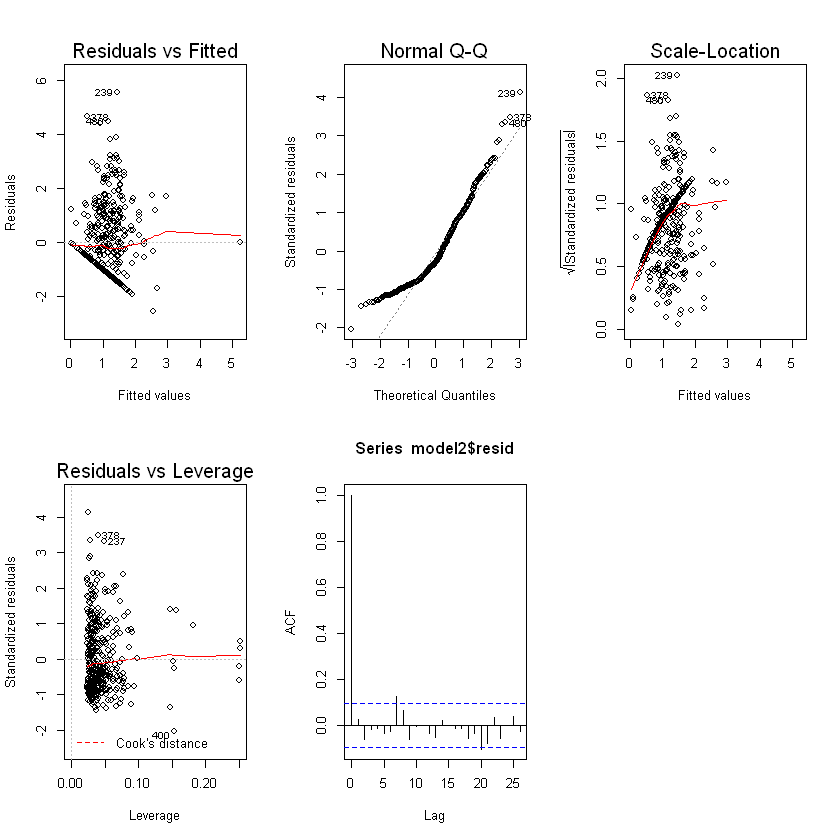

In [29]:
par(mfrow = c(2, 3))
plot(model2)
acf(model2$resid)

Comparing to the full model, there is a improvement in the residuals vs leverage plot, as it does not indicate any influence point.

The next model is using forward and backward selection based on the full model. Then compare these three models

### Third model using backward and forward selection

In [30]:
# backward selection
step(modelfull, direction = 'backward')

Start:  AIC=279.83
log(area + 1) ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain + day_type + season

           Df Sum of Sq    RSS    AIC
- temp      1     0.693 714.25 278.24
- DC        1     1.728 715.28 278.83
- rain      1     1.787 715.34 278.87
- ISI       1     1.944 715.50 278.96
- FFMC      1     2.115 715.67 279.06
- day_type  1     2.986 716.54 279.56
<none>                  713.56 279.83
- DMC       1     4.433 717.99 280.39
- RH        1     5.226 718.78 280.85
- season    3    19.211 732.77 284.81
- Y         6    31.102 744.66 285.45
- wind      1    15.906 729.46 286.94
- X         8    42.101 755.66 287.51

Step:  AIC=278.23
log(area + 1) ~ X + Y + FFMC + DMC + DC + ISI + RH + wind + rain + 
    day_type + season

           Df Sum of Sq    RSS    AIC
- rain      1     1.429 715.68 277.06
- DC        1     1.526 715.78 277.12
- FFMC      1     2.170 716.42 277.49
- ISI       1     2.208 716.46 277.51
- day_type  1     2.630 716.88 277.75
<none>       


Call:
lm(formula = log(area + 1) ~ X + Y + DMC + RH + wind + season, 
    data = train_data)

Coefficients:
 (Intercept)            X2            X3            X4            X5  
    1.225302      0.015592     -0.764653     -0.204543     -0.721121  
          X6            X7            X8            X9            Y3  
   -0.042079     -0.092858     -0.082039      1.475189      0.533091  
          Y4            Y5            Y6            Y8            Y9  
    0.511959      0.400765      0.635660      4.389519     -1.493075  
         DMC            RH          wind  seasonSpring  seasonSummer  
    0.002343     -0.007822      0.109550     -0.817701     -0.962697  
seasonAutumn  
   -0.481813  


In [31]:
# Build a null model for forward selection
modelnull = lm(log(area+1)~1, data = train_data)

In [32]:
# forward selection
step(modelnull, scope = list(lower = modelnull, upper = modelfull), direction = 'forward')

Start:  AIC=288.53
log(area + 1) ~ 1

           Df Sum of Sq    RSS    AIC
+ season    3   17.2796 809.24 285.81
+ wind      1    8.5394 817.98 286.24
+ Y         6   24.6200 801.90 288.04
+ RH        1    4.8350 821.69 288.11
<none>                  826.52 288.53
+ DC        1    1.6852 824.84 289.69
+ ISI       1    1.5371 824.99 289.76
+ day_type  1    1.0695 825.45 290.00
+ rain      1    0.7008 825.82 290.18
+ DMC       1    0.6598 825.86 290.20
+ temp      1    0.4741 826.05 290.29
+ FFMC      1    0.2862 826.24 290.39
+ X         8   26.2440 800.28 291.20

Step:  AIC=285.81
log(area + 1) ~ season

           Df Sum of Sq    RSS    AIC
+ wind      1   11.9844 797.26 281.64
+ RH        1    5.0282 804.22 285.23
+ Y         6   24.2548 784.99 285.24
+ temp      1    4.1929 805.05 285.66
<none>                  809.24 285.81
+ DMC       1    3.8894 805.35 285.82
+ X         8   30.1793 779.06 286.11
+ FFMC      1    2.0618 807.18 286.75
+ day_type  1    1.3679 807.88 287.11
+ rain 


Call:
lm(formula = log(area + 1) ~ season + wind + X + Y + RH + DMC, 
    data = train_data)

Coefficients:
 (Intercept)  seasonSpring  seasonSummer  seasonAutumn          wind  
    1.225302     -0.817701     -0.962697     -0.481813      0.109550  
          X2            X3            X4            X5            X6  
    0.015592     -0.764653     -0.204543     -0.721121     -0.042079  
          X7            X8            X9            Y3            Y4  
   -0.092858     -0.082039      1.475189      0.533091      0.511959  
          Y5            Y6            Y8            Y9            RH  
    0.400765      0.635660      4.389519     -1.493075     -0.007822  
         DMC  
    0.002343  


The aim of using the stepwise function is to find the model with minimum AIC value. The backward elimination starting from the model with the full model and take variables out if it can decrease the value of AIC. From the output, if the temperature is removed, the AIC will drop to 278.24 from 279.83. If the regression continues to drop one more explanatory variable, the AIC will further decrease until an optimal point. The Forward selection starting from the null model and put a new variable into the regression if it reduces the AIC. From the output, the variable season, wind, X, and Y coordinate, RH and DMC are included, and the AIC is 272.84, where initially is 288.53. 

Both forward and backward selection indicates the regression contains season, wind, X, and Y coordinate, RH, DMC is the most optimal regression based on AIC value. The third regression will be modeled. 

In [33]:
# The model based on forward and backward selection
finalmodel = lm(log(area+1)~X + Y + DMC + RH + wind + season, data = train_data)

Warning message:
"not plotting observations with leverage one:
  274"Warning message:
"not plotting observations with leverage one:
  274"

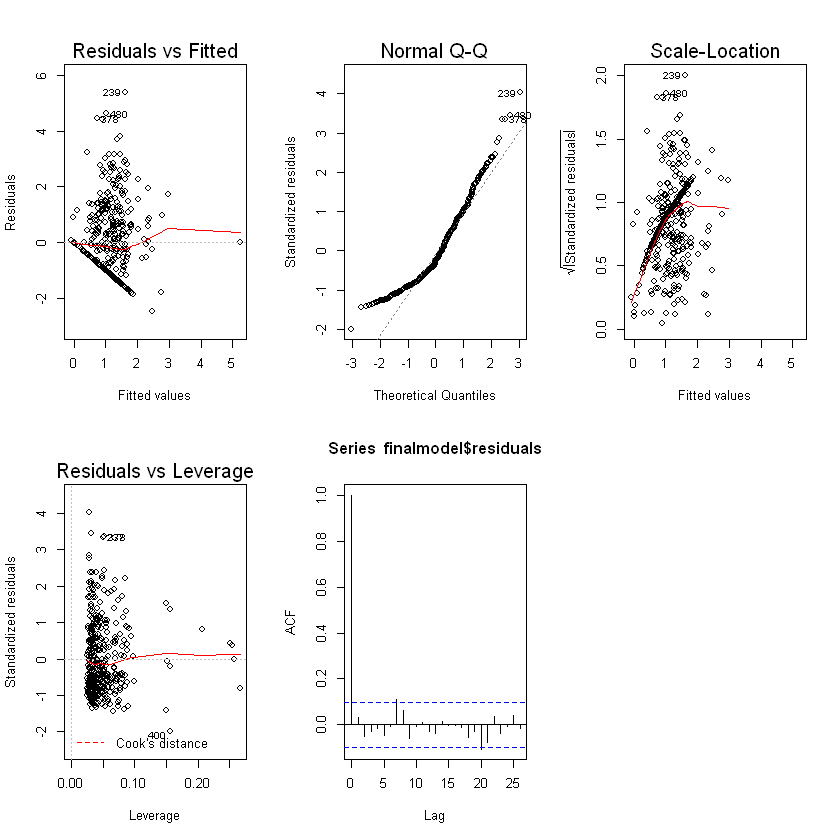

In [34]:
# Diagnostic test
par(mfrow = c(2,3))
plot(finalmodel)
acf(finalmodel$residuals)

From the residual check, the first graph named 'Residuals VS Fitted' is used to check for non-randomness. It is expected to see the residuals are equally spread around the horizontal line without distinct patterns. The graph indicates the red line is not horizontal at 0. Therefore, the residuals violate the assumption of non-randomness. 

The second graph named 'Normal Q-Q' is used to test the normality assumption. The graph shows the normal probability plot of residual is not following the red line as the tail of the qqplot is skewed away from the dashed line. Therefore, further statistics tests, like the Shapiro test needed to conduct.

The third graph named 'Scale-Location' is used to check the homogeneity of variance of the residuals. The plot shows the red line is not a horizontal line, which indicates the residuals violate the assumption of homoscedasticity. Further test like ncv test is needed to conduct. 

The fourth graph named 'Residuals VS Leverage' is used to check whether there is an influence point. From the graph, there is no point go beyond the cook's distance. Therefore, the residuals do not have an influential point effect. 

The last graph named 'Series residuals' is used to test the auto-correlation within the residuals. Based on the 5% significant level, it is expected to see a lag exceeds a 5% significance level for every 20 lags. Therefore, the graph shows the errors does not dependent on the last lag. Further test like the Durbin-Watson test is needed to conduct. 

In [35]:
# Multicollinearity test
vif(finalmodel)

,GVIF,Df,GVIF^(1/(2*Df))
X,8.536279,8,1.143416
Y,7.886409,6,1.187791
DMC,1.995935,1,1.412775
RH,1.072460,1,1.035597
wind,1.102259,1,1.049885
season,2.504708,3,1.165358


Since there are some categorical variables involved, like X and Y coordinates, and season. The value of GVIF^(1/(2*Df)) is used to test the multicollinearity. If any value in the column GVIF^(1/(2*Df)) exceeds 2, the corresponding variable might have a multicollinearity problem.

Based on the table above, none of these values exceeds 2. Therefore, there is no multicollinearity problem detected. 

Although this study explored there is a correlation between each variable during the EDA part, statistics show there is no multicollinearity when building models. There are two kinds of multicollinearity:
- structural multicollinearity: this type occurs when building models using related terms
- data multicollinearity: this type of multicollinearity is present in the data itself rather than impacting models

In this case, data multicollinearity could explain the correlation among variables does not influence the linear model

In [36]:
# non-constant error variance test
#H0: Errors have a constant Variance

#H1: Errors have a non-constant variance
ncvTest(finalmodel)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 11.22705, Df = 1, p = 0.00080614

The statistics of the p-value from ncvTest is less than 5% significant level, the hypothesis of errors have a constant variance is rejected. Therefore, the residuals violate the assumption of homoscedasticity. 

In [37]:
# Test for Normally Distributed Errors
#H0: Errors are normally distributed

#H1: Errors are not normally distributed
shapiro.test(finalmodel$residuals)


	Shapiro-Wilk normality test

data:  finalmodel$residuals
W = 0.92349, p-value = 1.147e-13


The statistics of the p-value from the Shapiro test is less than 5% significant level, which indicates the null hypothesis of errors are normal distributed is rejects. Therefore, the errors violate the assumption of normal distribution.

In [38]:
# Test for Autocorrelated Errors
#H0: Errors are uncorrelated

#H1: Errors are correlated
durbinWatsonTest(finalmodel)

 lag Autocorrelation D-W Statistic p-value
   1       0.0315145      1.935245   0.496
 Alternative hypothesis: rho != 0

The statistics of the p-value from the Durbin-Watson test is greater than the 5% significance level, which means the null hypothesis of errors is uncorrelated cannot be rejected. Therefore, the errors do not correlate with previous lags. 

Overall, after conducting diagnostic tests and relevant hypothesis tests, not all assumptions of linear regression are followed. The main problem of this final model is the residual is not randomly distributed and the variance is not constant. 

However, after building the GAM model for the same explanatory variables, the effective degrees of freedom suggests the most appropriate complexity of the smooth for each explanatory variable is 1. Therefore, there is no need to do any transformation about each dependent variable, and then fit into the linear regression

Therefore, the non-linear model is introduced.

### Separate the data and area for both training set and testing set

In [39]:
train.data = data[train_sample,-c(3:4,13:15)] #without the area column
train.label = data[train_sample,13] #only the area column
test.data = data[-train_sample,-c(3:4,13:15)] #without the area column
test.label = data[-train_sample,13] #without the area column

In [40]:
# KNN regression and ridge regression only take numeric inputs
# Convert factors into numeric
train.data$X = as.numeric(train.data$X)
train.data$Y = as.numeric(train.data$Y)
test.data$X = as.numeric(test.data$X)
test.data$Y = as.numeric(test.data$Y)

### KNN regression 

In [41]:
# Build a function to calculate the RMSE using knn regression
knn_pred = function(k, train.data, train.label, test.data, test.label) {
  pred = knn.reg(train = train.data, 
                 test = test.data, 
                 y = train.label, k = k)$pred
  return(sqrt(mean((pred - test.label)^2)))
}

In [42]:
# Set up values of k from 1 to 50, and sotre the RMSE for each k in the knn regression 
K = seq(1,50)
knn_df = data.frame()

In [43]:
for (k in K){
    pred = knn_pred(k, train.data, log(train.label+1), test.data, log(test.label+1))
    knn_df = rbind(knn_df, c(k, pred))
}
colnames(knn_df) = c('k', 'RMSE')
head(knn_df)

k,RMSE
1,2.083375
2,1.827188
3,1.630933
4,1.619414
5,1.575487
6,1.513888


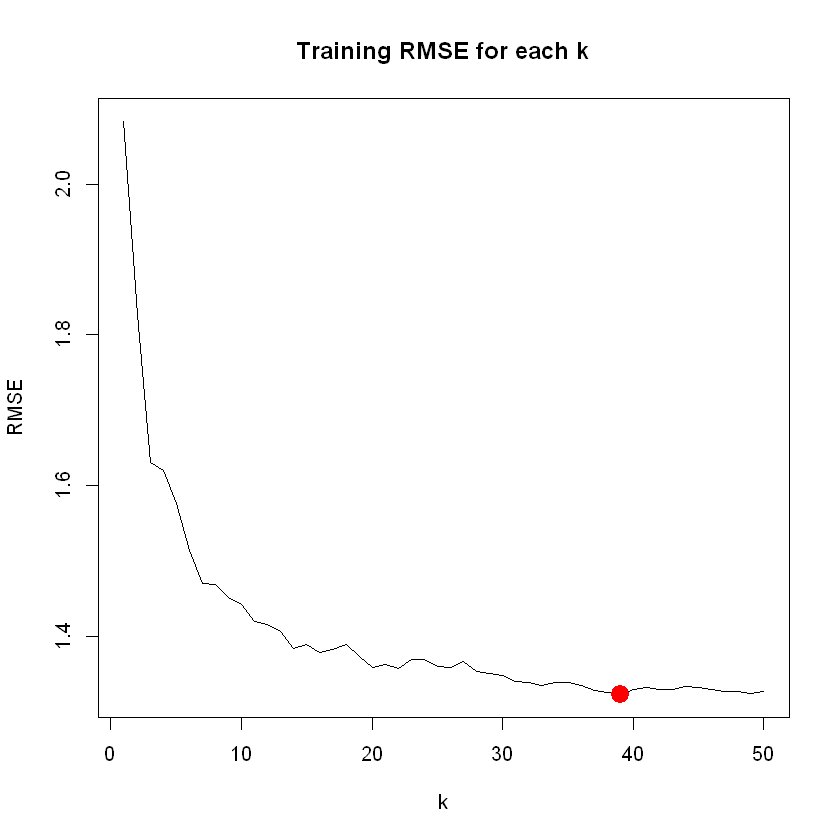

In [44]:
# Visualise the training RMSE for each value of k
plot(knn_df, type = 'l', main = 'Training RMSE for each k')
points(knn_df[which.min(knn_df$RMSE),], col = 'red', cex = 3, pch = 20)

From the training set, when k = 39, the RMSE is the lowest. Therefore, the trained knn regression uses k =39 

In [45]:
# Train the knn regression
knnreg = knn.reg(train.data, test.data, train.label, k = 39)

Due to the limitation of KNN regression, it is difficult to interpret the regression. 

The predicted value of KNN regression is averaging K neighbours area value, and then connect all the predicted value as a line. It is not possible to test the significance of the regression, and the value of R square.

### Ridge Regression

There are two regularisation terms. One is ridge regularisation, which is also called L2 regularisation, and the other one is Lasso regularisation, which is called L1 regularisation. 

In this study, ridge regression is used instead of lasso regression. The reason will be discussed in the later section

In [46]:
train.mat <- model.matrix(area ~ ., data = train_data)[,-1]
test.mat <- model.matrix(area ~ ., data = test_data)[,-1]

In [47]:
# Generate a list of lambda to do croos-validation
grid <- 10^seq(4, -2, length = 100)

In [48]:
set.seed(1)

# cross-validatation step
cv.ridge <- cv.glmnet(train.mat, log(train.label+1), alpha = 0, lambda = grid, thresh = 1e-12)

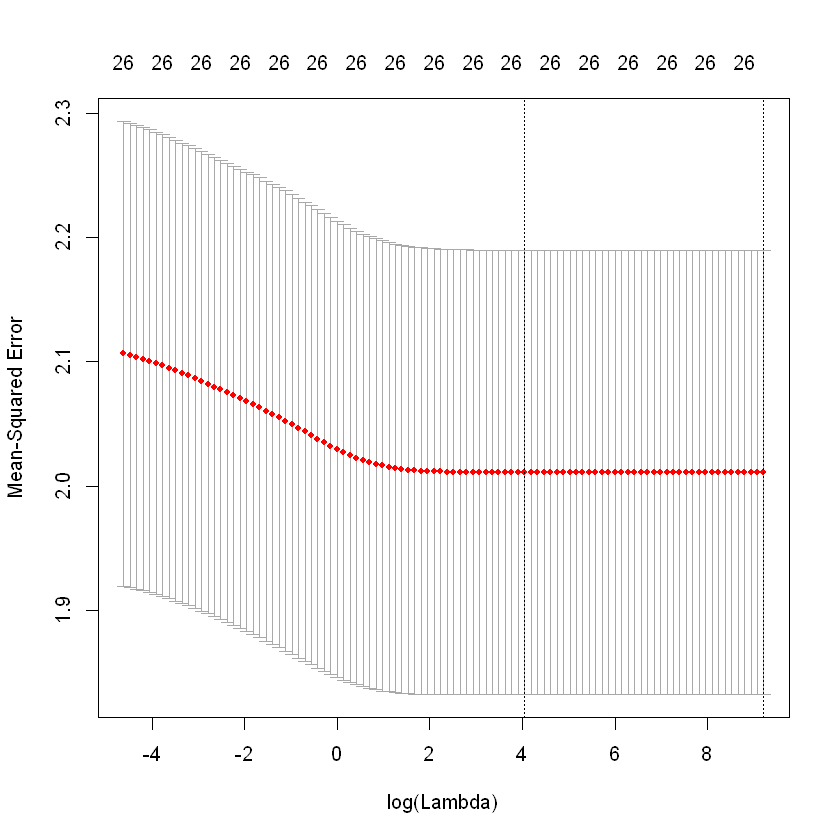

In [49]:
plot(cv.ridge)

As the value of lambda increases, the impact of shrinkage penalty grows and the mean squared error is decreasing. If the lambda equals to 0, the ridge regression will produce the classic least square coefficients, as there is no penalty term. 

From the plot, the minimum MSE is reached when the log(lambda) is about 4.

In [50]:
# find the optimal value of lambda
bestlam.ridge <- cv.ridge$lambda.min
bestlam.ridge

[1] 57.22368

By taking the exponential of the log(lambda), the best value of lambda in ridge regression is 57.2. The ridge model is then built by using this best value of lambda

In [51]:
# train the ridge regression using optimal value of lambda
fit.ridge <- glmnet(train.mat, log(train.label+1), alpha = 0, lambda = bestlam.ridge)

In [52]:
coef(fit.ridge)

27 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)         1.145823e+00
X2                  1.207142e-04
X3                 -1.472112e-02
X4                  2.122972e-03
X5                 -1.132560e-02
X6                  3.425665e-03
X7                  3.138448e-03
X8                  4.412979e-03
X9                  1.783977e-02
Y3                  4.498025e-03
Y4                 -7.390598e-05
Y5                 -7.068478e-04
Y6                  3.011701e-03
Y8                  9.832401e-02
Y9                 -1.343831e-02
FFMC                1.274680e-04
DMC                 1.512450e-05
DC                  5.811787e-06
ISI                -3.245555e-04
temp                1.327636e-04
RH                 -1.622898e-04
wind                1.944829e-03
rain                3.049840e-03
day_typeWorkingday -2.611382e-03
seasonSpring       -7.087381e-03
seasonSummer       -5.878745e-03
seasonAutumn        6.834313e-03

Similarly, the limitation of ridge regression is lacking of interpretability. The regression only tells the coefficient of each explanatory variable without the associate p-value.

From the ridge regression, all coefficients except intercept are not significant from 0, but not equals to 0. This is because the ridge regression shrinks the coefficients towards zero, but will not set any of them exactly to 0. If Lasso regularisation implied, the coefficients of each variable will equal to 0. 

# 4. Model Comparsion<a class="anchor" id="sec_4"></a>

## During training process

### For linear model
There are three linear models developed, and their R square are shown as below

In [53]:
cat('The adjusted R square of modelfull is: ', summary(modelfull)$adj.r.squared, '\n')
cat('The adjusted R square of model2 is: ', summary(model2)$adj.r.squared, '\n')
cat('The adjusted R square of finalmodel is: ', summary(finalmodel)$adj.r.squared)

The adjusted R square of modelfull is:  0.07852689 
The adjusted R square of model2 is:  0.07386821 
The adjusted R square of finalmodel is:  0.08156332

Comparing the adjusted R Square of these models, the final model has the highest explanatory power. 

In [54]:
anova(modelfull, model2, finalmodel)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
386,713.5558,NA,NA,NA,NA
394,732.0268,-8,-18.47101,1.248993,0.26918081
392,722.2595,2,9.76732,2.641830,0.07251863


The summary of each linear regression is provided as above. The adjusted R-Square is similar for each model, which all about 0.08, and the p-value of the F-test in each model all suggests that there is at least one variable that is significant from 0. Therefore, it is important to use the ANOVA test to select one linear model to do the predicting. 

Based on the full model, the final model removes some variables using forward and backward selection, and lead to a significantly improved fit over the full model and best subset selection model at the 0.1 significance level.

Therefore, the linear model called the final model will be chosen to do further analysis.

In [55]:
summary(finalmodel)


Call:
lm(formula = log(area + 1) ~ X + Y + DMC + RH + wind + season, 
    data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4815 -1.0445 -0.3440  0.7945  5.3828 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.225302   0.473454   2.588  0.01001 * 
X2            0.015592   0.281159   0.055  0.95580   
X3           -0.764653   0.329717  -2.319  0.02090 * 
X4           -0.204543   0.297020  -0.689  0.49145   
X5           -0.721121   0.377381  -1.911  0.05675 . 
X6           -0.042079   0.310639  -0.135  0.89232   
X7           -0.092858   0.323798  -0.287  0.77443   
X8           -0.082039   0.411415  -0.199  0.84205   
X9            1.475189   0.582384   2.533  0.01170 * 
Y3            0.533091   0.350379   1.521  0.12895   
Y4            0.511959   0.297932   1.718  0.08652 . 
Y5            0.400765   0.312520   1.282  0.20047   
Y6            0.635660   0.420071   1.513  0.13103   
Y8            4.389519   1.430493   3.069

Based on the summary result of this final linear model, 
- The adjusted R square is 0.08, which is higher than that value in other models. It explains 8% of the variation in the log(area+1).
- The F-statistic is 2.829 with p-value less than 5% significance level, which suggest at least one variable in this regression is significant at the 5% significance level 

### For KNN regression

As discussed in the model development section, based on the training data set, k = 39 has the lowest RMSE for KNN regression. Therefore, the knn regression which k = 39 will be trained, and used to do further prediction 

### For Ridge regression

As discussed in the model developed section, by using cross-validation to get the optimal value of lambda, then use that lambda to train the ridge regression to do further prediction task.

Overall, here are three models to do the prediction, one is a linear model using both forward and backward selection; the second one is the KNN regression, and the last one is the ridge regression. 

### Comparison between the OLS and Ridge regression before testing

In [56]:
# Calculate the R-Square of ridge regression
SST = sum((log(train.label+1) - mean(log(train.label+1)))^2)
SSE = sum((predict(fit.ridge, newx = train.mat) - log(train.label+1))^2)
Rsq = 1 - SSE/SST
cat('The R square of ridge regression is: ', Rsq, '\n')
cat('The R square of linear model is: ', summary(finalmodel)$r.squared)

The R square of ridge regression is:  0.004974744 
The R square of linear model is:  0.1261476

In terms of the R square of these models, only the linear model can provide the R square easily, whereas the R square of the ridge regression is computed manually. Comparing the statistics of R square in these two models, the linear model explains 12.6% of the variation in the log(area+1), whereas the ridge regression only explains 0.5% of the variation of the dependent variable. 

Although the linear model has a higher value of R-Square, it may not perform better than the ridge regression in predicting. 

Since the p-value of each coefficient cannot be accessed, this report will further compare the magnitude of coefficients between the linear model and ridge regression. 


After comparing the coefficients in these two models, 
- only the value of the intercept is similar, whereas all values of coefficients are close to 0. 
- those significant coefficients in the linear model have the same direction effect as the coefficients in the ridge regression.

## During testing process

In [57]:
# predict the area in the test set using ridge regression
pred.ridge = predict(fit.ridge, newx = test.mat)

In [58]:
cat('The RMSE of linear model is: ', sqrt(mean((predict(finalmodel, test_data)-log(test.label+1))^2)), '\n')
cat('The RMSE of KNN regression is: ', sqrt(mean((knnreg$pred - log(test.label+1)^2))), '\n')
cat('The RMSE of ridge regression is: ', sqrt(mean((pred.ridge - log(test.label+1))^2)))

The RMSE of linear model is:  1.362098 
The RMSE of KNN regression is:  3.596741 
The RMSE of ridge regression is:  1.329006

From the above statistics, it shows the RMSE of ridge regression performs better than the other two models, and the non-parametric model performs worse than the parametric model in this case. However, there is no significant difference in RMSE between ridge regression and linear regression. This is because the ridge regression only adds a penalty term based on the linear regression model, and the coefficients in the linear model are different from the ridge regression, as the ridge regression shrinks all coefficients approximately 0. 

### Detailed comparison between models

Linear model:
- Advantages of using the linear model:
    1. Easy to fit, and fast to predict
    2. Easy to interpret

- Disadvantages of using the linear model;
    1. Strong assumptions implied about the linear model. 
    2. It will produce poor prediction if the true relationship is non-linear

### Linear model VS KNN regression

The KNN regression is non-linear regression. There are many differences between the KNN regression and linear models.
1. KNN regression is not a single formula like the linear model. The KNN regression can predict the output value for any given point. Repeating the process for all the input in the training dataset, the regression will be the line that connects all the predicted points. 

2. Different values of k will influence the regression. If K equals 1, it will result in overfitting, and K equals to the size of the training set, which will result in underfitting, as the KNN regression is just a horizontal line at the mean of the predictor variable. Therefore, it is important to choose the appropriate value of k to train the knn regression. 

Advantages of using KNN regression:
1. If the relationship between independent variables and dependent variables in non-linear, KNN regression performs better than linear regression. 

2. It does not need to calculate the particular parameters during the training process. Therefore, comparing to the linear model, the KNN regression is trained faster than the linear model. 

Disadvantages of using KNN regression:
1. Comparing to the linear model, although KNN regression performs faster than the linear model during the training process, it is slower than the linear model during the testing process. 

2. KNN regression lacks interpretability. Unlike the linear model, the coefficients and significance of each variable can be clearly interpreted. It is difficult to interpret which variables or features are significant in the KNN regression. 

3. KNN regression does not support feature selection.

###  Ridge regularisation VS Lasso regularisation

There are two regularisation terms, and this report only conducts ridge regression instead of Lasso regularisation. The reason is the difference between these two regularisations:
- Ridge Regularisation mainly used to prevent overfitting, but it is not useful in case of a high dimension of input variables. Besides, it helps to solve the multicollinearity problem. 
- Lasso Regularisation provides sparse solutions, but useful in case of a high dimension of input variables. 

In the training dataset, there are 413 rows and 12 features, which shows the dimension of input variables is lower than the numbers of records of the dataset. Besides, the coefficients in the ridge regression are all approximate to 0, which means these explanatory variables have weak explanation power in predicting the area. If Lasso regularisation applied instead of ridge regularisation, all coefficients will shrink to 0. Therefore, the Ridge regression should perform better than the lasso regression in this case. 

### Ridge regression VS Linear model and KNN regression

The linear model has a low bias but high variances, whereas the ridge regression trades variance for bias. This means the variance of the predicted variable from ridge regression is lower than that from linear regression, but bias is higher. Since the ridge regression shrinks the coefficients towards zero, this introduces some bias.

Similar to the linear model, ridge regression minimizes the usual linear regression plus a regularisation term, which means ridge regression is a parametric model. However, KNN regression is a non-parametric regression. 

Advantages of using Ridge regression:
1. Both KNN regression and linear regression does not differentiate important from less important predictors in a model. These two models just include all the inputs, which may lead to overfitting. Ridge regression introduce penalty term to penalise the coefficients of those are not important variables. 
2. The variance is lower than the linear model
3. Prevent multicollinearity problem

Disadvantages of using ridge regression:
1. Similar to KNN regression, it lacks interpretation
2. Biased comparing to the linear model
3. Similar to KNN regression, it does not perform feature selection. It will only shrink the coefficients towards zero, but will not set any of them exactly to 0. 

# 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

As discussed in the model development and model comparison section with relevant statistics analysis. Steps to identify the subset of attributes are listed as following:

- Step 1: 
    - Build three models to compare.
    - The first model is based on the best subset selection; the second model is simply the full model and the last one is using backward and forward selection based on the full model. The backward and forward selection gives the same model, which includes X, Y coordinates, season, wind, rain, RH, and DMC.
    - The forward and backward selection is based on the AIC value, which aims to find the model with the lowest AIC
    - The AIC of the final model is 272.84, whereas initially, it is 288.53
    - p-value of each coefficient shows they are significant at the 5% significance level

- Step 2:
    - Then use the ANOVA test to test the significance of three linear models. Statistics show that the final model removes some variables leading to a significantly improved fit over the full model and best subset selection model at 0.1 significance level.
    
- Step 3:
    - From the summary of the final model, the p-values of each coefficient (except some dummy variables) are lower than the 5% significant level, which means they are significant from 0. 

        - The significant features are X3, X5, X9, Y4, Y8, Y9, RH index, spring, summer, and wind. 

        - For the X coordinate, X3 and X5 have a negative impact on the area of bushfire, and X9 positively affects the area of bushfire. 

        - For Y coordinate, Y4 and Y8 positively affect the area of bushfire, and Y9 has a negative impact on the bushfire area.

        - RH index, spring, and summer are negatively related to the bushfire area. 

        - The wind is positively related to the bushfire area.

Overall, the reason why the chosen subset of attributes have a significant impact on the prediction of the response variable is
- the model with chosen subset has higher adjusted R square
- the annova test suggest the model with chosen subset is more significantly in explaining the response variable
- the pvaluse of the most explanatory variables are significant at the 5% significance level

Interpretation of the linear models are: (Note the area is log(area + 1)
- If the bushfire happens at X2, the burned area will increase by 0.015 hec compareing to X1
- If the bushfire happens at X3, the burned area will decrease by 0.53 hec compareing to X1
- If the bushfire happens at X4, the burned area will decrease by 0.185 hec compareing to X1
- If the bushfire happens at X5, the burned area will decrease by 0.51 hec compareing to X1
- If the bushfire happens at X6, the burned area will decrease by 0.04 hec compareing to X1
- If the bushfire happens at X7, the burned area will decrease by 0.089 hec compareing to X1
- If the bushfire happens at X8, the burned area will decrease by 0.077 hec compareing to X1
- If the bushfire happens at X9, the burned area will increase by 3.37 hec compareing to X1
- If the bushfire happens at Y3, the burned area will increase by 0.7 hec compareing to Y2
- If the bushfire happens at Y4, the burned area will increase by 0.669 hec compareing to Y2
- If the bushfire happens at Y5, the burned area will increase by 0.492 hec compareing to Y2
- If the bushfire happens at Y6, the burned area will increase by 0.888 hec compareing to Y2
- If the bushfire happens at Y8, the burned area will increase by 79.64 hec compareing to Y2
- If the bushfire happens at Y9, the burned area will decrease by 0.77 hec compareing to Y2
- one unit increase in DMC index, the burned area will increase by 0.002 hec
- one unit increase in RH index, the burned area will decrease by 0.008 hec
- one unit increase in wind speed, the burned area will decrease by 0.116 hec
- If the bushfire happens during spring, the burned area will decrease by 0.56 hec compareing to winter
- If the bushfire happens during summer, the burned area will decrease by 0.62 hec compareing to winter
- If the bushfire happens during autumn, the burned area will decrease by 0.382 hec compareing to winter

Surprisingly, the coefficient of summer is negatively relate to the bushfire area, which contradict to the finding from EDA. 

After these important features are selected, they are also used in ridge regression, in order to compare the prediction score. Since all models using the same features to do the prediction, it is easier to understand the difference between these models by comparing the test score. Besides, as ridge regression is based on the linear model with an extra penalty term, by comparing the test score of these two regressions, the advantage of including a penalty term will be demonstrated.

# 6. Conclusion <a class="anchor" id="sec_6"></a>

Overall, the non-parametric model performs the worst in predicting burned areas comparing to parametric models. Within parametric models, including a ridge regularisation slightly improves the predicting score, which produces a smaller RMSE during test process. 

From the EDA part, this notebook found that most of the features are either positively or negatively correlate with each other. However, it does not cause a multicollinearity problem during modeling. The season is an important feature, as most of the attributes shown some seasonality effect. Interestingly, from the findings of EDA, most of the bushfire happened during summer and the total area burned during summer is higher than in other seasons. However, both linear model and ridge regression show the summer negatively correlates to the area burned. 

During the modeling process, it is important to select the best subset of features using the steps mentioned in section 5. As higher the adjusted R Square, the higher chance to predict the response variable in the test set. 

Besides, a comprehensive comparison between these models is well present, which helps people to understand the advantages and disadvantages associate with each model. 

# 7. References <a class="anchor" id="sec_7"></a>

- Multicolliearity:
    - https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
- KNN regression:
    - https://daviddalpiaz.github.io/r4sl/knn-reg.html
    - https://towardsdatascience.com/the-basics-knn-for-classification-and-regression-c1e8a6c955
- Ridge regression
    - https://stepupanalytics.com/ridge-regression-and-its-application/